In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

df = pd.DataFrame(X, columns=diabetes.feature_names)
print(df.isnull().sum()) 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


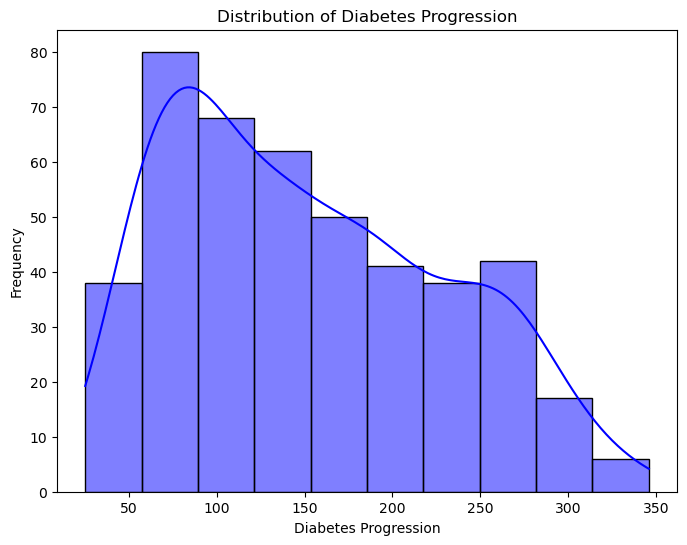

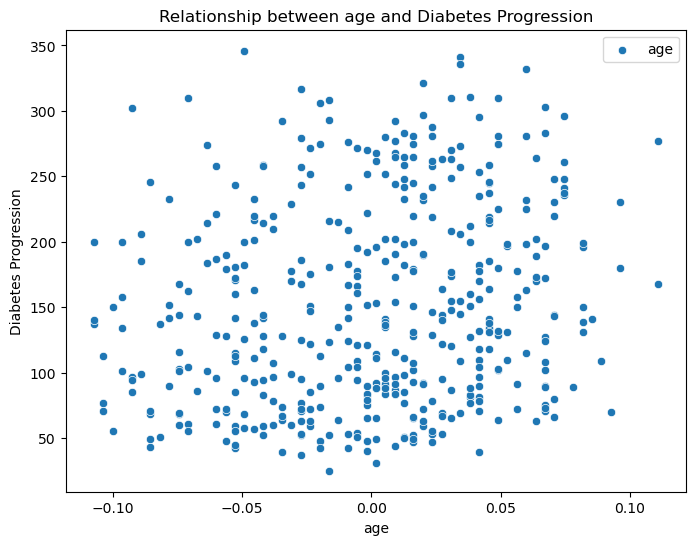

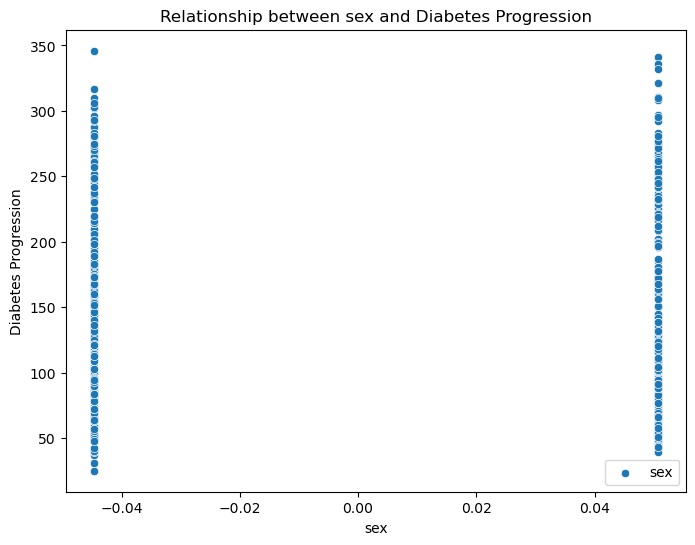

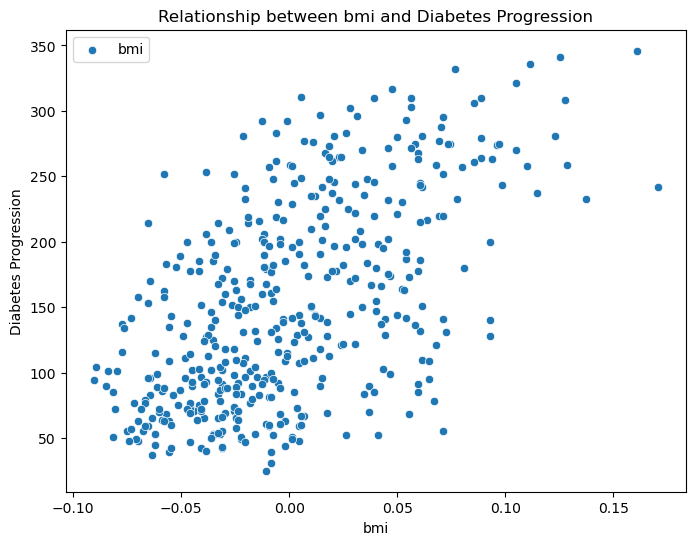

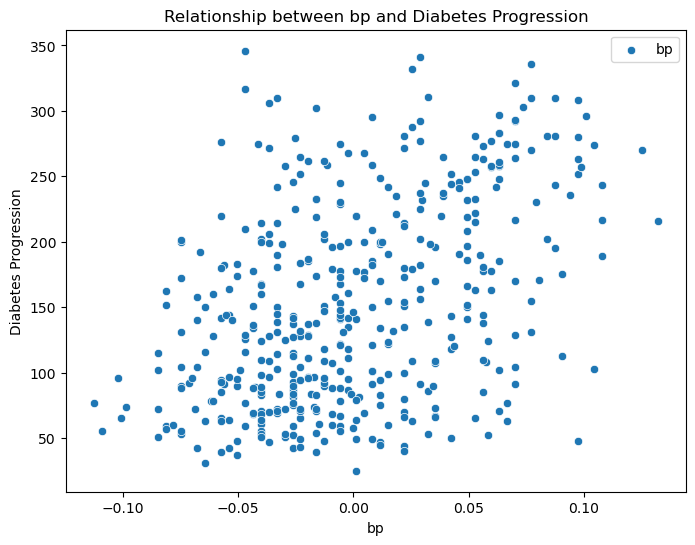

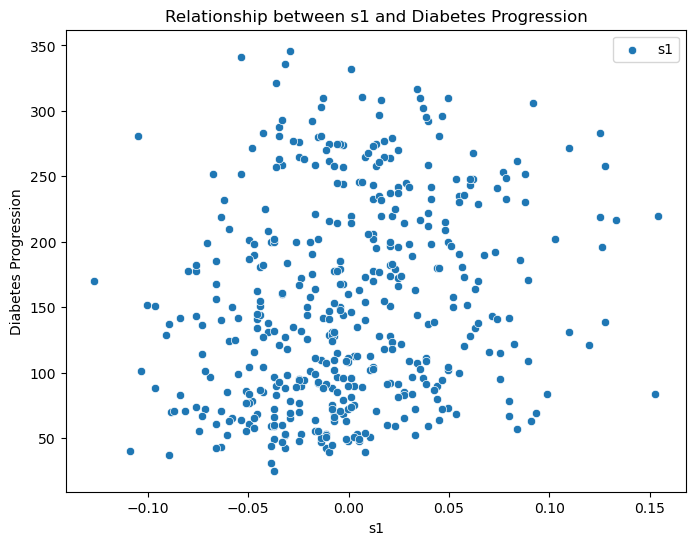

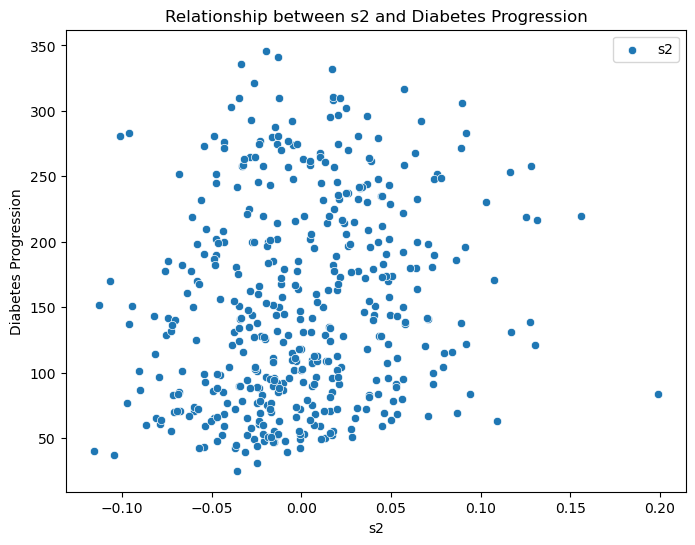

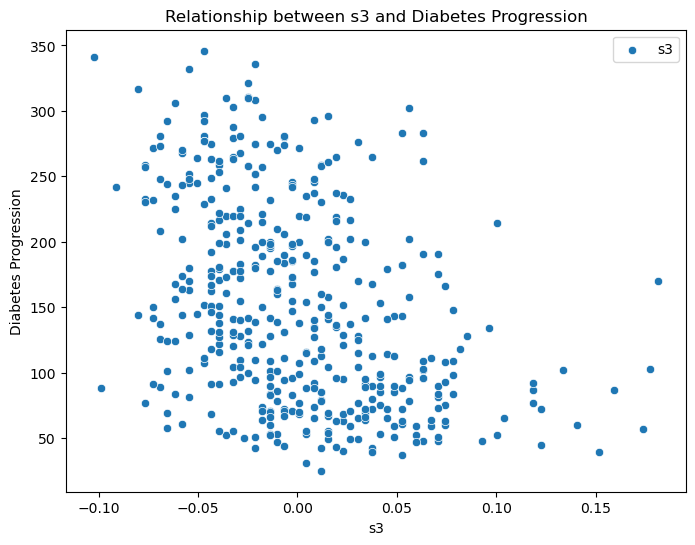

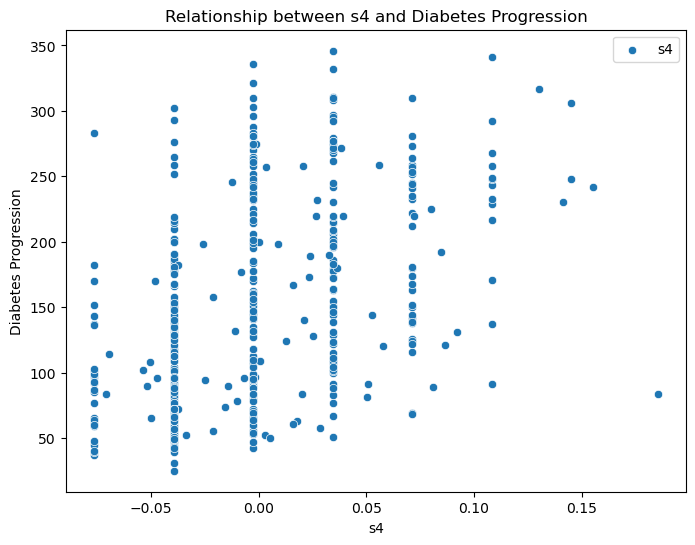

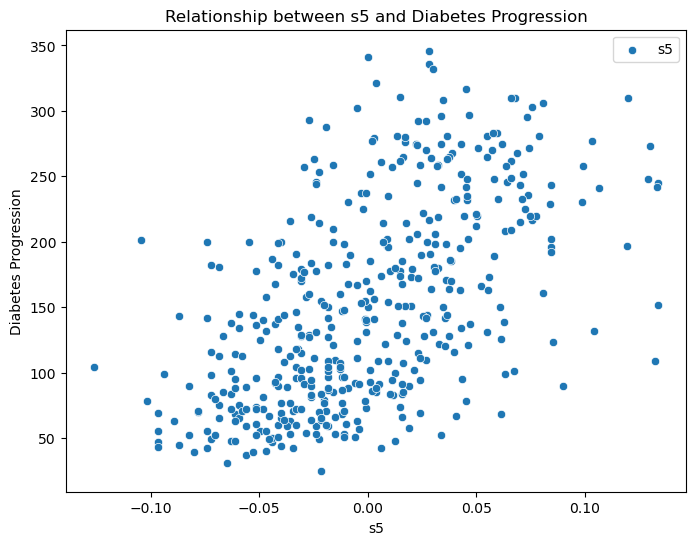

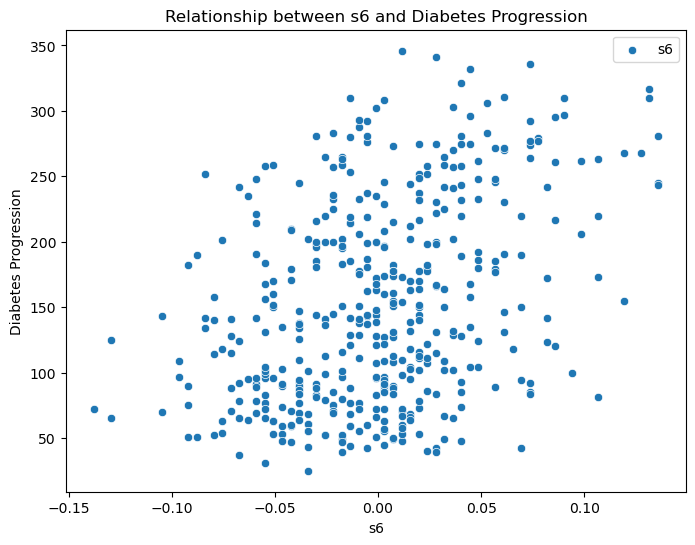

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, color='blue')
plt.title("Distribution of Diabetes Progression")
plt.xlabel("Diabetes Progression")
plt.ylabel("Frequency")
plt.show()

for i, feature in enumerate(diabetes.feature_names):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, i], y=y, label=feature)
    plt.title(f"Relationship between {feature} and Diabetes Progression")
    plt.xlabel(feature)
    plt.ylabel("Diabetes Progression")
    plt.show()


In [ ]:
!pip install tensorflow


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1)  # Output layer
])

model.compile(optimizer=Adam(), loss='mean_squared_error')


In [ ]:

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
